# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results,mouse_metadata)

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = df[df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID']
rep_mice = []
for x in dups:
    if x not in rep_mice:
        rep_mice.append(x)

rep_mice

['g989']

In [4]:

# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID']==rep_mice[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df[df['Mouse ID']!=rep_mice[0]]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
d_mean=pd.DataFrame(cleaned_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
d_median=pd.DataFrame(cleaned_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].median()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})
d_var=pd.DataFrame(cleaned_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].var()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})
d_std=pd.DataFrame(cleaned_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].std()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'})
d_sem=pd.DataFrame(cleaned_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].sem()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})

# Assemble the resulting series into a single summary DataFrame.
drugs_summary = pd.merge(pd.merge(pd.merge(pd.merge(d_mean,d_median),d_var),d_std),d_sem).set_index('Drug Regimen')
drugs_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mice Timpoints'>

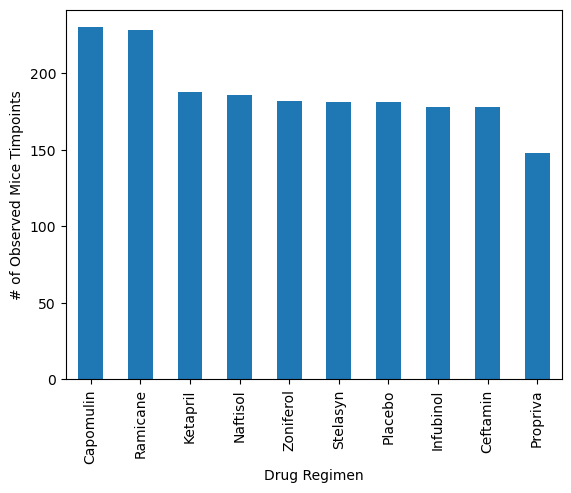

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Display the plot
regimen_counts = cleaned_df['Drug Regimen'].value_counts().sort_values(ascending=False)
regimen_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mice Timpoints')


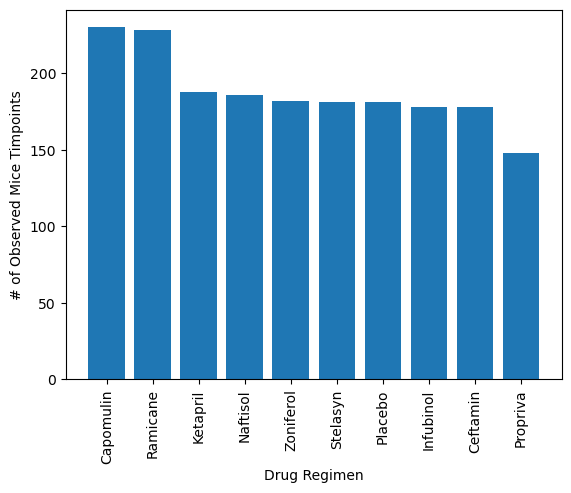

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_df['Drug Regimen'].value_counts().sort_values(ascending=False)
regimens= regimen_counts.index.to_list()
plt.bar(regimens,regimen_counts)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mice Timpoints')
plt.show()


Text(0, 0.5, 'Sex')

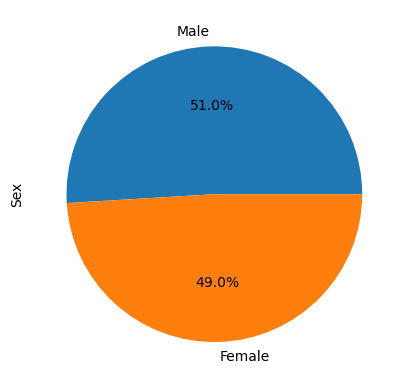

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = cleaned_df['Sex'].value_counts().sort_values(ascending=False)
sex_count.plot(kind='pie',autopct="%.1f%%").set_ylabel("Sex")

Text(0, 0.5, 'Sex')

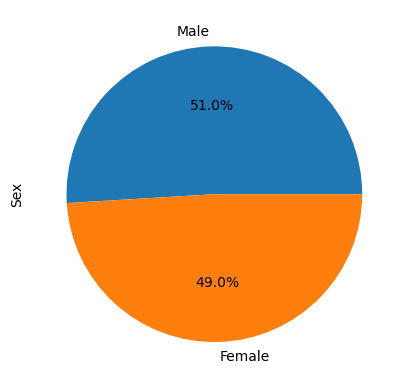

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = cleaned_df['Sex'].value_counts().sort_values(ascending=False)
sex_count
plt.pie(sex_count,labels=sex_count.index.to_list(), autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index().merge(cleaned_df, on=['Mouse ID','Timepoint'])
max_timepoints


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data ={}    
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for drug in treatments:
    tumor_volume_data[drug]=max_timepoints.loc[max_timepoints['Drug Regimen']==drug,'Tumor Volume (mm3)']
    quartiles = tumor_volume_data[drug].quantile([0.25, 0.5, 0.75])
    lowq = quartiles[0.25]
    uppq = quartiles[0.75]
    mean = tumor_volume_data[drug].mean()
    iqr = uppq - lowq
    lowbound = lowq - (1.5 * iqr)
    uppbound = uppq + (1.5 * iqr)
    outlier = tumor_volume_data[drug].loc[(lowbound > tumor_volume_data[drug]) | (tumor_volume_data[drug]> uppbound)].to_list()
    print(f'''
            {drug}:
            IQR: {iqr}
            outliers: {outlier}
            
    ''')
    tumor_volume_data[drug].reset_index


    




            Capomulin:
            IQR: 7.781863460000004
            outliers: []
            
    

            Ramicane:
            IQR: 9.098536719999998
            outliers: []
            
    

            Infubinol:
            IQR: 11.477135160000003
            outliers: [36.3213458]
            
    

            Ceftamin:
            IQR: 15.577752179999997
            outliers: []
            
    


<Axes: >

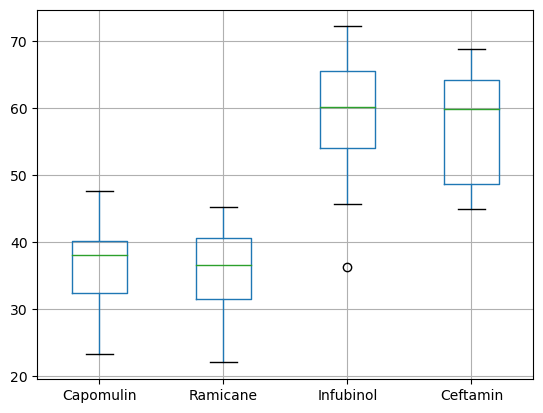

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
pd.DataFrame(tumor_volume_data).boxplot()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

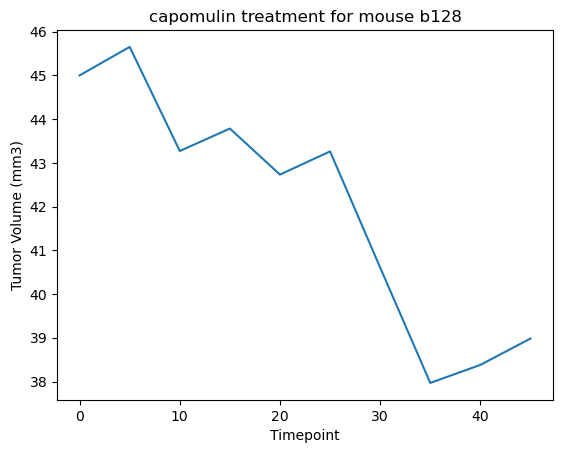

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_b128=cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin'].loc[cleaned_df['Mouse ID']=='b128']
plt.plot(capomulin_b128['Timepoint'],capomulin_b128['Tumor Volume (mm3)'])
plt.title('capomulin treatment for mouse b128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

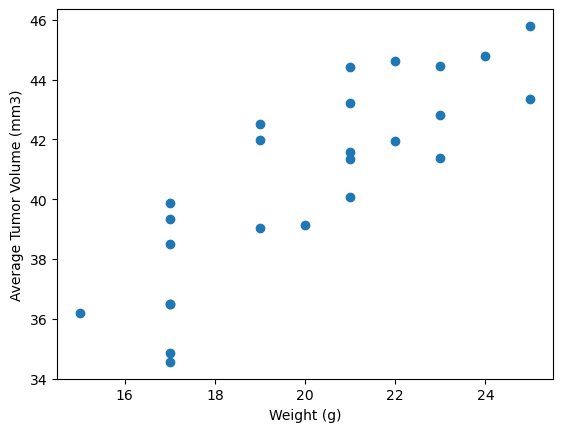

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_weightA = pd.DataFrame(cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index()
capomulin_weightB = pd.DataFrame(cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()).reset_index()
merged_df = pd.merge(capomulin_weightA, capomulin_weightB, on='Mouse ID', how='inner')
plt.scatter(merged_df['Weight (g)'],merged_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


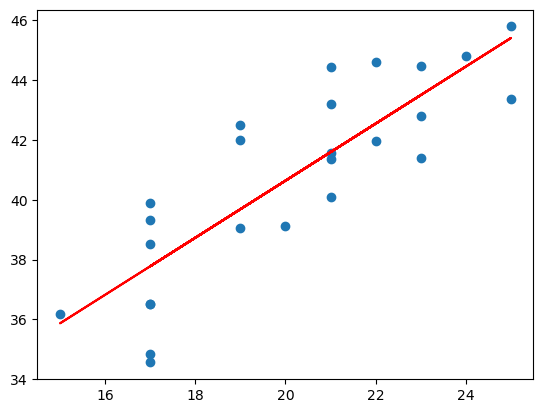

In [18]:
# Calculate the correlation coefficient and a linear regression model 
(cc,pv)=st.pearsonr(merged_df['Weight (g)'],merged_df['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {cc:.2f}')
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(m,b, rvalue, pvalue, stderr) = st.linregress(merged_df['Weight (g)'],merged_df['Tumor Volume (mm3)'])

predictions = m*merged_df['Weight (g)']+b
plt.scatter(merged_df['Weight (g)'],merged_df['Tumor Volume (mm3)'])
plt.plot(merged_df['Weight (g)'],predictions, color = 'r')
plt.show()